# Correlação: Pearson, Spearman e Kendall na prática

**Objetivo:** Entender como calcular, visualizar e interpretar correlações entre variáveis numéricas e ordinais, além de reconhecer os limites dessas análises.

Vamos explorar as três principais medidas de correlação usadas na prática: **Pearson**, **Spearman** e **Kendall**.

---

## 🔍 O que é correlação?
Correlação mede o **grau de associação entre duas variáveis**. Ela varia de -1 (correlação negativa perfeita) a +1 (correlação positiva perfeita).

- **+1:** conforme uma variável aumenta, a outra também aumenta perfeitamente.
- **0:** sem relação linear aparente.
- **-1:** conforme uma variável aumenta, a outra diminui perfeitamente.

## 📈 Correlação de Pearson (linear)
Mede a associação linear entre duas variáveis contínuas.

> Em resumo: ela responde “Essas duas variáveis sobem e descem juntas, de forma proporcional?”


| Valor           | Interpretação                            |
| --------------- | ---------------------------------------- |
| **1,0**        | Correlação  perfeita (X ↑ → Y ↑)          |
| **0,7 a 0,9**   | Correlação forte                         |
| **0,4 a 0,6**   | Correlação moderada                      |
| **0,1 a 0,3**   | Correlação fraca                         |
| **0**           | Sem correlação linear                    |


**💡 Importante:**
* Pearson mede apenas linearidade!
* Se a relação for curva (ex: em U), Pearson pode não funcionar bem.
* Requer que os dados tenham distribuição próxima da normal.
* É sensível a outliers (um ponto fora da curva pode distorcer o resultado).

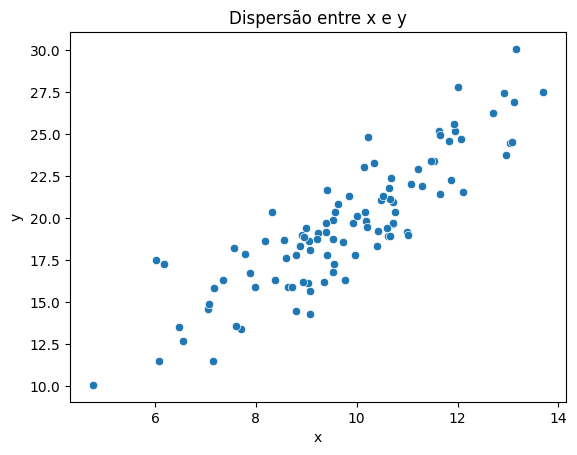

Correlação de Pearson: 0.87


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

# Dados simulados com correlação linear
np.random.seed(42)
x = np.random.normal(10, 2, 100)
y = 2 * x + np.random.normal(0, 2, 100)

# Visualização
sns.scatterplot(x=x, y=y)
plt.title('Dispersão entre x e y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Correlação de Pearson
corr, _ = pearsonr(x, y)
print(f'Correlação de Pearson: {corr:.2f}')

## 📊 Correlação de Spearman (ordinais ou não lineares)
Spearman mede a força e a direção da relação entre duas variáveis com base na ordem (ranking) dos valores — ou seja, se uma variável sobe, a outra também sobe (ou desce), mesmo que não seja de forma linear.

> 🔁 Ela não olha para os valores em si, mas para a posição relativa dos valores.



### Relação monotônica ≠ linear
* Monotônica: uma variável sempre cresce ou sempre decresce em relação à outra, mas não precisa ser em linha reta.
* Exemplo clássico: idade vs. nível de colesterol — até certa idade cresce, depois estabiliza → Pearson pode falhar, Spearman detecta

###Intervalo de valores

* +1 = correlação monotônica perfeita positiva
* 0 = sem correlação monotônica
* -1 = correlação monotônica perfeita negativa

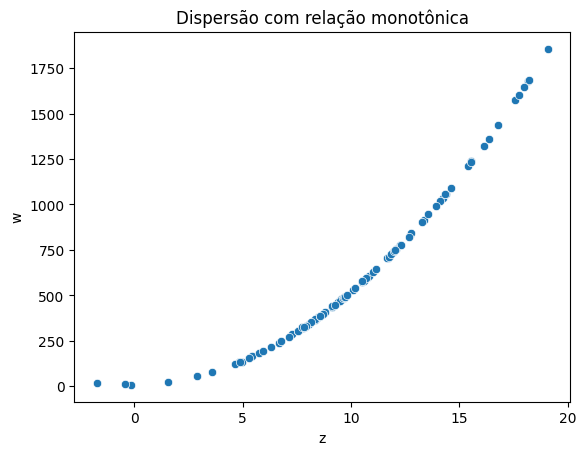

Correlação de Spearman: 1.00
Correlação de Pearson: 0.95


In [20]:
# Relação não linear (curva)
z = np.random.normal(10, 4, 100)
w = 5*z*z + z + np.random.normal(10, 2, 100)

sns.scatterplot(x=z, y=w)
plt.title('Dispersão com relação monotônica')
plt.xlabel('z')
plt.ylabel('w')
plt.show()

# Correlação de Spearman
corr_s, _ = spearmanr(z, w)
print(f'Correlação de Spearman: {corr_s:.2f}')
# Correlação de Pearson
corr, _ = pearsonr(z, w)
print(f'Correlação de Pearson: {corr:.2f}')

###Quando é melhor usar Pearson (em vez de Spearman)?
* Relação linear
* Pearson mede a força real da proporção entre as variáveis.
* Ele usa os valores exatos, e não só a ordem como Spearman
* Pearson fornece informações quantitativas mais sensíveis
* É mais usado em análises paramétricas, onde os dados seguem regras estatísticas específicas

## 🪢 Correlação de Kendall (resistente a empates)
Mede a força da associação com base em **pares concordantes e discordantes**.

> Em vez de olhar para os valores ou só a ordem geral (como Spearman), Kendall analisa todos os pares possíveis e verifica se eles estão concordando ou discordando entre si.

###🎯 Para que serve?

* Quer medir relação de ordem (monotônica) entre variáveis
* Tem muitos empates nos dados (valores repetidos)
* Trabalha com dados ordinais ou com pequenas amostras
* Quer uma medida mais conservadora e estável do que Spearman

Imagine que você tem duas variáveis:

Pessoa | Variável A | Variável B
-------|------------|------------
  1    |     5      |     7
  2    |     3      |     4
  3    |     6      |     8


Kendall vai comparar todos os pares possíveis:

* Pessoa 1 vs. Pessoa 2
* Pessoa 1 vs. Pessoa 3
* Pessoa 2 vs. Pessoa 3

Para cada par, ele vê:

* Se A aumenta e B também aumenta → par concordante
* Se A aumenta e B diminui → par discordante
* Se empata em algum → ignora ou trata de forma especial

τ=  n° de pares concordantes−n° de pares discordantes

​n° total de pares



In [21]:
# Correlação de Kendall
corr_k, _ = kendalltau(z, w)
print(f'Correlação de Kendall: {corr_k:.2f}')

Correlação de Kendall: 0.99


## ⚠️ Quando a correlação engana

### Exemplo 1: Relação não linear
Mesmo com uma relação clara, Pearson pode dar uma correlação baixa.

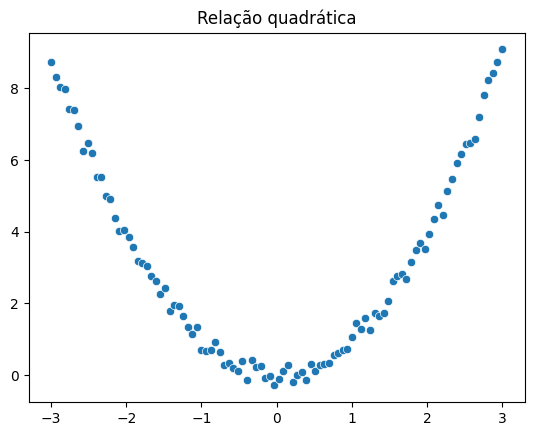

Correlação de Pearson (relação em U): 0.01
Correlação de Spearman: 0.00
Correlação de Kendall: 0.00


In [24]:
# Relação em forma de U
x_u = np.linspace(-3, 3, 100)
y_u = x_u**2 + np.random.normal(0, 0.2, 100)

sns.scatterplot(x=x_u, y=y_u)
plt.title('Relação quadrática')
plt.show()

# Correlação de Pearson
corr_u, _ = pearsonr(x_u, y_u)
print(f'Correlação de Pearson (relação em U): {corr_u:.2f}')

# Correlação de Spearman
corr_s, _ = spearmanr(x_u, y_u)
print(f'Correlação de Spearman: {corr_s:.2f}')

# Correlação de Kendall
corr_k, _ = kendalltau(x_u, y_u)
print(f'Correlação de Kendall: {corr_k:.2f}')

## 📊 Comparativo entre as medidas de correlação



| Característica               | Pearson | Spearman      | Kendall        |
| ---------------------------- | ------- | ------------- | -------------- |
| Tipo de relação              | Linear  | Monotônica    | Monotônica     |
| Usa valores ou ordem?        | Valores | Ordem (ranks) | Ordem (pares)  |
| Robusto a outliers           | ❌ Não   | ✅ Sim         | ✅ Sim          |
| Melhor para ordinais?        | ❌ Não   | ✅ Sim         | ✅ Sim          |
| Interpretação conservadora   | ❌       | Média         | ✅ Mais estável |
| Ideal para dados com empates | ❌       | ⚠️ Regular    | ✅ Excelente    |
